# Artificial Neural Network - Bank

# Import libraries

In [1]:
#%pip install --upgrade pip keras tensorflow numpy pandas sklearn scikit-learn matplotlib seaborn

In [2]:
# code for preventing tensorflow to show an red 'error' message after the imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import sys
import os
import numpy as np
import sklearn as sk
import pandas as pd
import tensorflow as tf
import matplotlib
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [4]:
print(f'Python version: {sys.version}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'SKLearn version: {sk.__version__}')
print(f'Tensorflow version: {tf.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Keras version: {keras.__version__}')

Python version: 3.8.12 (default, Oct  4 2021, 17:34:15) 
[GCC 9.3.0]
Numpy version: 1.22.4
Pandas version: 2.0.0
SKLearn version: 1.2.2
Tensorflow version: 2.5.0
Matplotlib version: 3.4.3
Seaborn version: 0.11.2
Keras version: 2.5.0


# Data

In [5]:
data = pd.read_csv('./as1-bank.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   marital    7842 non-null   int64 
 2   education  7842 non-null   int64 
 3   default    7842 non-null   object
 4   balance    7842 non-null   int64 
 5   housing    7842 non-null   object
 6   loan       7842 non-null   object
 7   contact    7842 non-null   int64 
 8   duration   7842 non-null   int64 
 9   campaign   7842 non-null   int64 
 10  pdays      7842 non-null   int64 
 11  previous   7842 non-null   int64 
 12  poutcome   7842 non-null   int64 
 13  y          7842 non-null   object
dtypes: int64(10), object(4)
memory usage: 857.8+ KB


In [7]:
data.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes


## Initial pre-processing

In [8]:
# make a controled random so everytime we run the code it gives same results

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
# check for duplicates

data.duplicated().sum()

0

In [10]:
# check for missing values

data.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# convert categorical variables

data.replace("yes", 1, inplace=True)
data.replace("no", 0, inplace=True)

In [12]:
# separate target y and features X

y = data.pop('y') #target
X = data

In [13]:
# converting to array

y = y.to_numpy()

# Function for the model architecture and evaluation

In [14]:
def make_model(name, hidlayers, units, activation, X):
    # parameters: name (name of model), hidlayers (number of hidden layers),
    # units (units per hidden layer), activation (activation for hidden layers),
    # X (the features data)

    # split standardazed data into training and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.3, random_state=2, shuffle=True)

    results = {} # save the results in a dictionary

    # model architecture
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(13)))
    for i in range(hidlayers):
        model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.summary()

    # model compiling
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # model fitting
    model_training_history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

    # model evaluation
    test_loss, test_acc = model.evaluate(X_test, Y_test)

    y_pred = model.predict(X_test)

    c_mtx = confusion_matrix(Y_test, np.round(y_pred))

    tn, fp, fn, tp = c_mtx.ravel()

    model_hist = model_training_history.history

    ass = accuracy_score(Y_test, np.round(y_pred))
    rs = recall_score(Y_test, np.round(y_pred))
    ps = precision_score(Y_test, np.round(y_pred))
    f1 = f1_score(Y_test, np.round(y_pred))


    # saving results
    results.update({'hidden_layers': hidlayers,
                 'units': units,
                 'activation': activation,
                 'test_loss': test_loss,
                 'test_acc': test_acc,
                 'c_mtx': c_mtx,
                 'tp': tp,
                 'fp': fp,
                 'tn': tn,
                 'fn': fn,
                 'ass': ass,
                 'rs': rs,
                 'ps': ps,
                 'f1': f1})

    globals()[name + '_hist'] = model_hist
    globals()[name] = results

# Scaling - Standardization vs Normalization

## Standardization Model
Data Scaling: Standardization<br>
Model architecture: One hidden layer with 32 nodes and 'relu' activation

In [15]:
# standardization
X_stand = StandardScaler().fit_transform(X)

In [16]:
make_model('mS',1,32,'relu',X_stand)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.5965 - val_loss: 0.5674 - val_accuracy: 0.7484
Epoch 2/50
172/172 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7761 - val_loss: 0.5019 - val_accuracy: 0.7684
Epoch 3/50
172/172 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7850 - val_loss: 0.4693 - val_accuracy: 0.7782
Epoch 4/50
172/172 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0

In [17]:
mS

{'hidden_layers': 1,
 'units': 32,
 'activation': 'relu',
 'test_loss': 0.35543984174728394,
 'test_acc': 0.8312792181968689,
 'c_mtx': array([[1680,  122],
        [ 275,  276]]),
 'tp': 276,
 'fp': 122,
 'tn': 1680,
 'fn': 275,
 'ass': 0.8312792180195495,
 'rs': 0.5009074410163339,
 'ps': 0.6934673366834171,
 'f1': 0.5816649104320336}

## Normalization Model
Data scaling: Normalization<br>
Model architecture: One hidden layer with 32 nodes and 'relu' activation

In [18]:
# normalization
X_norm = MinMaxScaler().fit_transform(X)

In [19]:
make_model('mN',1,32,'relu',X_norm)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 5ms/step - loss: 0.6037 - accuracy: 0.7513 - val_loss: 0.5547 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5335 - accuracy: 0.7750 - val_loss: 0.5283 - val_accuracy: 0.7658
Epoch 3/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.7750 - val_loss: 0.5163 - val_accuracy: 0.7658
Epoch 4/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5080 - accuracy:

In [20]:
mN

{'hidden_layers': 1,
 'units': 32,
 'activation': 'relu',
 'test_loss': 0.4330565333366394,
 'test_acc': 0.7904802560806274,
 'c_mtx': array([[1717,   85],
        [ 408,  143]]),
 'tp': 143,
 'fp': 85,
 'tn': 1717,
 'fn': 408,
 'ass': 0.7904802379940501,
 'rs': 0.2595281306715064,
 'ps': 0.6271929824561403,
 'f1': 0.36713735558408217}

## Scaling methods evaluation

The analysis of the graphs demonstrates that Standardization scaling method has an overall better performance compared to the Normalization model, specially if we look at our focus metrics, lowering the FN and raising TP. Therefore, this method will be used for the following models.

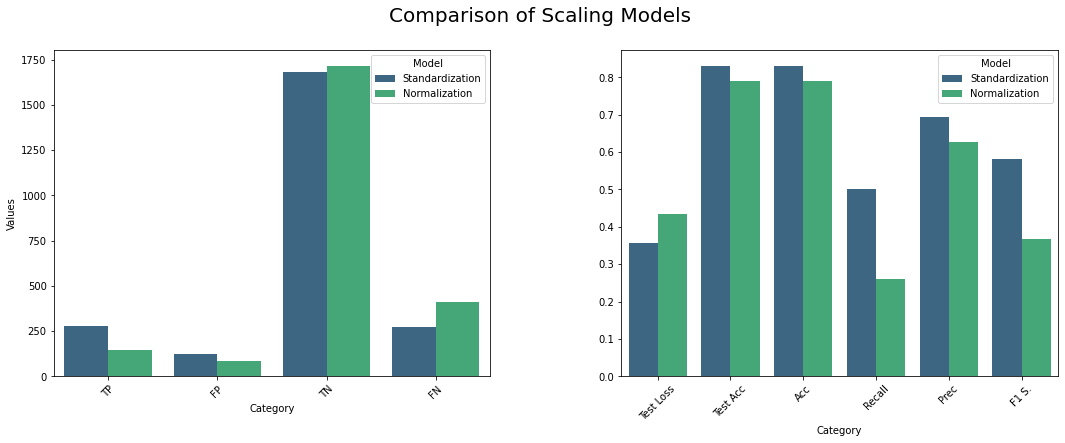

In [21]:
# plotting evaulation

plt.figure(figsize=(18, 6))


# values
keys_tn = ['tp', 'fp', 'tn', 'fn']
mS_tn = [mS.get(key) for key in keys_tn]
mN_tn = [mN.get(key) for key in keys_tn]

keys_acc = ['test_loss', 'test_acc', 'ass', 'rs', 'ps', 'f1']
mS_acc = [mS.get(key) for key in keys_acc]
mN_acc = [mN.get(key) for key in keys_acc]


# categories
categories_tn = ['TP', 'FP', 'TN', 'FN']

categories_acc = ['Test Loss', 'Test Acc', 'Acc', 'Recall', 'Prec', 'F1 S.']


# data
df_tn = {'Category': categories_tn,
        'Standardization': mS_tn,
        'Normalization': mN_tn}
df_tn = pd.DataFrame(df_tn)

df_acc = {'Category': categories_acc,
        'Standardization': mS_acc,
        'Normalization': mN_acc}
df_acc = pd.DataFrame(df_acc)


# melt data into a single column
melted_df_tn= df_tn.melt('Category', var_name='Model', value_name='Value')

melted_df_acc= df_acc.melt('Category', var_name='Model', value_name='Value')


# subplot 1 TP, TN, FP, FN
plt.subplot(1, 2, 1)  # 1 row, 2columns, subplot 1
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_tn, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=45)


# subplot 2 test loss, test acc, accuracy, precision, recall, and F1 score
plt.subplot(1, 2, 2)  # 1 row, 3 columns, subplot 2
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_acc, palette='viridis')
plt.xlabel('Category')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45)

# spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.suptitle('Comparison of Scaling Models', fontsize=20)
plt.show()

# Models - hidden layers and nodes

Comparisons of various ANN architectures (hidden layers / nodes)

## Model SLP - Single Layer Perceptron

In [22]:
# test train
X_train, X_test, Y_train, Y_test = train_test_split(
        X_stand, y, test_size=0.3, random_state=2, shuffle=True)

# model architecture
modelSLP = keras.Sequential()
modelSLP.add(layers.Dense(1, input_dim=13, activation="sigmoid"))
modelSLP.summary()

# model compiling
modelSLP.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# model fitting
modelSLP_training_history = modelSLP.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

# model evaluation
test_loss_SLP, test_acc_SLP = modelSLP.evaluate(X_test, Y_test)

y_pred_SLP = modelSLP.predict(X_test)

c_mtx_SLP = confusion_matrix(Y_test, np.round(y_pred_SLP))

tn_SLP, fp_SLP, fn_SLP, tp_SLP = c_mtx_SLP.ravel()

mSLP_hist = modelSLP_training_history.history

ass_SLP = accuracy_score(Y_test, np.round(y_pred_SLP))
rs_SLP = recall_score(Y_test, np.round(y_pred_SLP))
ps_SLP = precision_score(Y_test, np.round(y_pred_SLP))
f1_SLP = f1_score(Y_test, np.round(y_pred_SLP))


# saving results
mSLP = {'test_loss': test_loss_SLP,
         'test_acc': test_acc_SLP,
         'c_mtx': c_mtx_SLP,
         'tp': tp_SLP,
         'fp': fp_SLP,
         'tn': tn_SLP,
         'fn': fn_SLP,
         'ass': ass_SLP,
         'rs': rs_SLP,
         'ps': ps_SLP,
         'f1': f1_SLP}

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.7917 - accuracy: 0.5691 - val_loss: 0.6749 - val_accuracy: 0.6413
Epoch 2/50
172/172 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.6972 - val_loss: 0.5534 - val_accuracy: 0.7386
Epoch 3/50
172/172 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7637 - val_loss: 0.4929 - val_accuracy: 0.7756
Epoch 4/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7848 - val_loss: 0.4613 - val_accuracy: 0.7884
Epoch 5/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4545 - a

In [23]:
mSLP

{'test_loss': 0.4128226041793823,
 'test_acc': 0.8045048713684082,
 'c_mtx': array([[1713,   89],
        [ 371,  180]]),
 'tp': 180,
 'fp': 89,
 'tn': 1713,
 'fn': 371,
 'ass': 0.8045048873778156,
 'rs': 0.32667876588021777,
 'ps': 0.6691449814126395,
 'f1': 0.43902439024390244}

## Model 1 - one hidden layer of 16 nodes

In [24]:
make_model('m1',1,16,'relu',X_stand)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 3ms/step - loss: 0.6054 - accuracy: 0.6907 - val_loss: 0.5440 - val_accuracy: 0.7471
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.5054 - accuracy: 0.7674 - val_loss: 0.4880 - val_accuracy: 0.7650
Epoch 3/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7763 - val_loss: 0.4586 - val_accuracy: 0.7743
Epoch 4/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy:

In [25]:
m1

{'hidden_layers': 1,
 'units': 16,
 'activation': 'relu',
 'test_loss': 0.36840522289276123,
 'test_acc': 0.8227794170379639,
 'c_mtx': array([[1675,  127],
        [ 290,  261]]),
 'tp': 261,
 'fp': 127,
 'tn': 1675,
 'fn': 290,
 'ass': 0.8227794305142372,
 'rs': 0.47368421052631576,
 'ps': 0.6726804123711341,
 'f1': 0.5559105431309904}

## Model 2 - two hidden layer of 16 nodes

In [26]:
make_model('m2',2,16,'relu',X_stand)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5832 - accuracy: 0.7264 - val_loss: 0.5220 - val_accuracy: 0.7688
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7754 - val_loss: 0.4943 - val_accuracy: 0.7714
Epoch 3/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4795 - accuracy: 0.7786 - 

In [27]:
m2

{'hidden_layers': 2,
 'units': 16,
 'activation': 'relu',
 'test_loss': 0.3582848012447357,
 'test_acc': 0.8317041993141174,
 'c_mtx': array([[1665,  137],
        [ 259,  292]]),
 'tp': 292,
 'fp': 137,
 'tn': 1665,
 'fn': 259,
 'ass': 0.8317042073948151,
 'rs': 0.52994555353902,
 'ps': 0.6806526806526807,
 'f1': 0.5959183673469388}

## Model 3 - three hidden layer of 16 nodes

In [28]:
make_model('m3',3,16,'relu',X_stand)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5873 - accuracy: 0.7388 - val_loss: 0.5341 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.7750 - val_loss: 

In [29]:
m3

{'hidden_layers': 3,
 'units': 16,
 'activation': 'relu',
 'test_loss': 0.35936692357063293,
 'test_acc': 0.8253293633460999,
 'c_mtx': array([[1629,  173],
        [ 238,  313]]),
 'tp': 313,
 'fp': 173,
 'tn': 1629,
 'fn': 238,
 'ass': 0.8253293667658309,
 'rs': 0.5680580762250453,
 'ps': 0.6440329218106996,
 'f1': 0.6036644165863065}

## Model 4 - one hidden layer of 32 nodes

In [30]:
make_model('m4',1,32,'relu',X_stand)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.6559 - accuracy: 0.6347 - val_loss: 0.4936 - val_accuracy: 0.7858
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4687 - accuracy: 0.7898 - val_loss: 0.4546 - val_accuracy: 0.7858
Epoch 3/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.7901 - val_loss: 0.4403 - val_accuracy: 0.7884
Epoch 4/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4350 - accuracy:

In [31]:
m4

{'hidden_layers': 1,
 'units': 32,
 'activation': 'relu',
 'test_loss': 0.3564363420009613,
 'test_acc': 0.8334041833877563,
 'c_mtx': array([[1688,  114],
        [ 278,  273]]),
 'tp': 273,
 'fp': 114,
 'tn': 1688,
 'fn': 278,
 'ass': 0.8334041648958777,
 'rs': 0.4954627949183303,
 'ps': 0.7054263565891473,
 'f1': 0.582089552238806}

## Model 5 - two hidden layer of 32 nodes

In [32]:
make_model('m5',2,32,'relu',X_stand)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5817 - accuracy: 0.7076 - val_loss: 0.5089 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7763 - val_loss: 0.4751 - val_accuracy: 0.7671
Epoch 3/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.781

In [33]:
m5

{'hidden_layers': 2,
 'units': 32,
 'activation': 'relu',
 'test_loss': 0.34695732593536377,
 'test_acc': 0.8376540541648865,
 'c_mtx': array([[1654,  148],
        [ 234,  317]]),
 'tp': 317,
 'fp': 148,
 'tn': 1654,
 'fn': 234,
 'ass': 0.8376540586485338,
 'rs': 0.5753176043557169,
 'ps': 0.6817204301075269,
 'f1': 0.6240157480314961}

## Model 6 - three hidden layer of 32 nodes

In [34]:
make_model('m6',3,32,'relu',X_stand)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5904 - accuracy: 0.7262 - val_loss: 0.5458 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.7750 - val_lo

In [35]:
m6

{'hidden_layers': 3,
 'units': 32,
 'activation': 'relu',
 'test_loss': 0.34379851818084717,
 'test_acc': 0.8436039090156555,
 'c_mtx': array([[1633,  169],
        [ 199,  352]]),
 'tp': 352,
 'fp': 169,
 'tn': 1633,
 'fn': 199,
 'ass': 0.8436039099022524,
 'rs': 0.6388384754990926,
 'ps': 0.6756238003838771,
 'f1': 0.6567164179104478}

## Model 7 - one hidden layer of 64 nodes

In [36]:
make_model('m7',1,64,'relu',X_stand)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7715 - val_loss: 0.4805 - val_accuracy: 0.7743
Epoch 2/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7865 - val_loss: 0.4458 - val_accuracy: 0.7828
Epoch 3/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.7916 - val_loss: 0.4285 - val_accuracy: 0.7926
Epoch 4/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy:

In [37]:
m7

{'hidden_layers': 1,
 'units': 64,
 'activation': 'relu',
 'test_loss': 0.3482952117919922,
 'test_acc': 0.8334041833877563,
 'c_mtx': array([[1682,  120],
        [ 272,  279]]),
 'tp': 279,
 'fp': 120,
 'tn': 1682,
 'fn': 272,
 'ass': 0.8334041648958777,
 'rs': 0.5063520871143375,
 'ps': 0.6992481203007519,
 'f1': 0.5873684210526315}

## Model 8 - two hidden layer of 64 nodes

In [38]:
make_model('m8',2,64,'relu',X_stand)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5446 - accuracy: 0.7697 - val_loss: 0.5062 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7774 - val_loss: 0.4672 - val_accuracy: 0.7688
Epoch 3/50
172/172 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.78

In [39]:
m8

{'hidden_layers': 2,
 'units': 64,
 'activation': 'relu',
 'test_loss': 0.3407067358493805,
 'test_acc': 0.8419039249420166,
 'c_mtx': array([[1668,  134],
        [ 238,  313]]),
 'tp': 313,
 'fp': 134,
 'tn': 1668,
 'fn': 238,
 'ass': 0.84190395240119,
 'rs': 0.5680580762250453,
 'ps': 0.7002237136465325,
 'f1': 0.627254509018036}

## Model 9 - three hidden layer of 64 nodes

In [40]:
make_model('m9',3,64,'relu',X_stand)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 4ms/step - loss: 0.5525 - accuracy: 0.7737 - val_loss: 0.5174 - val_accuracy: 0.7658
Epoch 2/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.7757 - val_l

In [41]:
m9

{'hidden_layers': 3,
 'units': 64,
 'activation': 'relu',
 'test_loss': 0.3408966660499573,
 'test_acc': 0.8436039090156555,
 'c_mtx': array([[1629,  173],
        [ 195,  356]]),
 'tp': 356,
 'fp': 173,
 'tn': 1629,
 'fn': 195,
 'ass': 0.8436039099022524,
 'rs': 0.6460980036297641,
 'ps': 0.6729678638941399,
 'f1': 0.6592592592592593}

## Evaluation of hidden layers and nodes
Best models taking into account lowest FN, higest TP, and best Recall score primarally were Model 9, 6 and 3 in that order.
So 3 hidden layers with 64 nodes, three hidden layers with 32 nodes and finally two hidden layers with 16 nodes as shown bellow.

### Graph - TP, TN, FP, FN Metrics

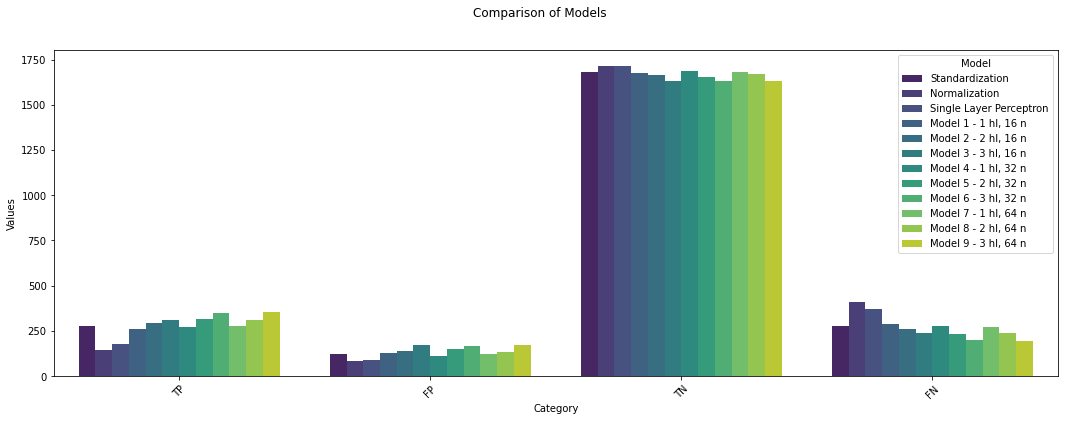

In [42]:
# plotting evaulation for TP, TN, FP, FN

plt.figure(figsize=(18, 6))

# values
keys_tn = ['tp', 'fp', 'tn', 'fn']
mS_tn = [mS.get(key) for key in keys_tn]
mN_tn = [mN.get(key) for key in keys_tn]
mSLP_tn = [mSLP.get(key) for key in keys_tn]
m1_tn = [m1.get(key) for key in keys_tn]
m2_tn = [m2.get(key) for key in keys_tn]
m3_tn = [m3.get(key) for key in keys_tn]
m4_tn = [m4.get(key) for key in keys_tn]
m5_tn = [m5.get(key) for key in keys_tn]
m6_tn = [m6.get(key) for key in keys_tn]
m7_tn = [m7.get(key) for key in keys_tn]
m8_tn = [m8.get(key) for key in keys_tn]
m9_tn = [m9.get(key) for key in keys_tn]


# data
df_tn = {'Category': categories_tn,
        'Standardization': mS_tn,
        'Normalization': mN_tn,
        'Single Layer Perceptron': mSLP_tn,
        'Model 1 - 1 hl, 16 n': m1_tn,
        'Model 2 - 2 hl, 16 n': m2_tn,
        'Model 3 - 3 hl, 16 n': m3_tn,
        'Model 4 - 1 hl, 32 n': m4_tn,
        'Model 5 - 2 hl, 32 n': m5_tn,
        'Model 6 - 3 hl, 32 n': m6_tn,
        'Model 7 - 1 hl, 64 n': m7_tn,
        'Model 8 - 2 hl, 64 n': m8_tn,
        'Model 9 - 3 hl, 64 n': m9_tn}
df_tn = pd.DataFrame(df_tn)


# melt data into a single column
melted_df_tn= df_tn.melt('Category', var_name='Model', value_name='Value')


# plotting
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_tn, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.suptitle('Comparison of Models')
plt.show()

### Graph - Accuracy, Recall, Precision and F1 Score Metrics

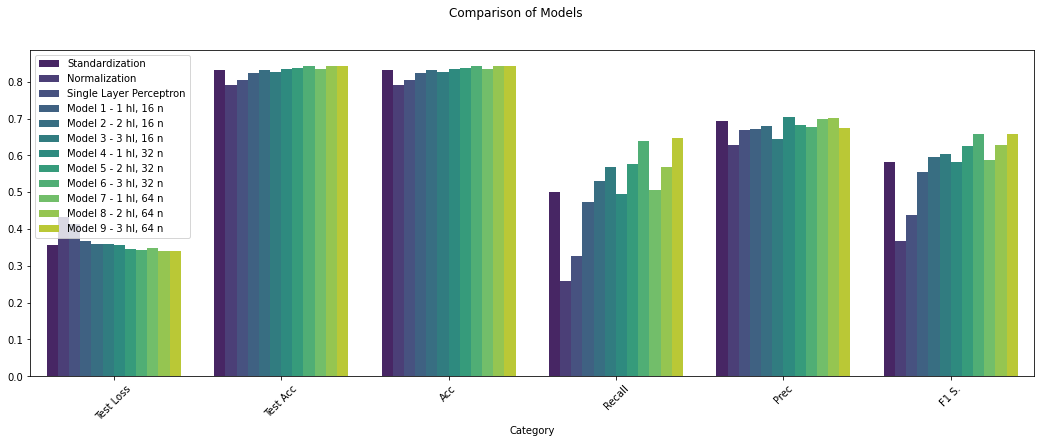

In [43]:
# plotting evaulation for test loss, test accuracy, accuracy, recall, precision and F1 score.

plt.figure(figsize=(18, 6))

# values
keys_acc = ['test_loss', 'test_acc', 'ass', 'rs', 'ps', 'f1']
mS_acc = [mS.get(key) for key in keys_acc]
mN_acc = [mN.get(key) for key in keys_acc]
mSLP_acc = [mSLP.get(key) for key in keys_acc]
m1_acc = [m1.get(key) for key in keys_acc]
m2_acc = [m2.get(key) for key in keys_acc]
m3_acc = [m3.get(key) for key in keys_acc]
m4_acc = [m4.get(key) for key in keys_acc]
m5_acc = [m5.get(key) for key in keys_acc]
m6_acc = [m6.get(key) for key in keys_acc]
m7_acc = [m7.get(key) for key in keys_acc]
m8_acc = [m8.get(key) for key in keys_acc]
m9_acc = [m9.get(key) for key in keys_acc]

# data
df_acc = {'Category': categories_acc,
        'Standardization': mS_acc,
        'Normalization': mN_acc,
        'Single Layer Perceptron': mSLP_acc,
        'Model 1 - 1 hl, 16 n': m1_acc,
        'Model 2 - 2 hl, 16 n': m2_acc,
        'Model 3 - 3 hl, 16 n': m3_acc,
        'Model 4 - 1 hl, 32 n': m4_acc,
        'Model 5 - 2 hl, 32 n': m5_acc,
        'Model 6 - 3 hl, 32 n': m6_acc,
        'Model 7 - 1 hl, 64 n': m7_acc,
        'Model 8 - 2 hl, 64 n': m8_acc,
        'Model 9 - 3 hl, 64 n': m9_acc}
df_acc = pd.DataFrame(df_acc)

# melt data into a single column
melted_df_acc= df_acc.melt('Category', var_name='Model', value_name='Value')

# plotting
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_acc, palette='viridis')
plt.xlabel('Category')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45)

plt.suptitle('Comparison of Models')
plt.legend(loc='upper left')

plt.show()

### Graph - Confusion Matrices

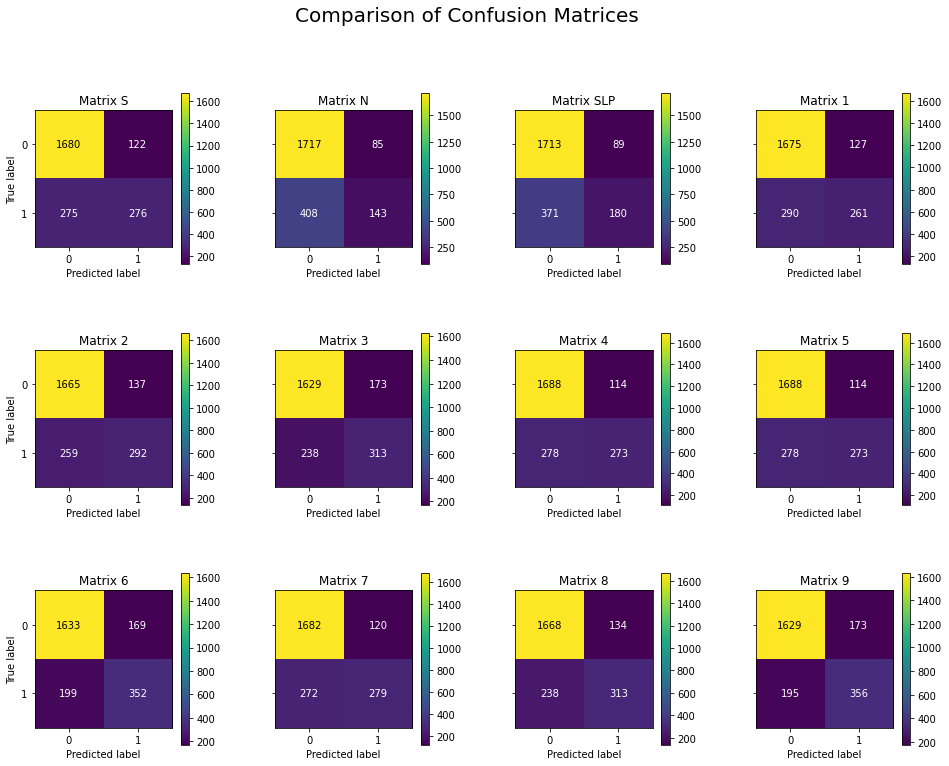

In [44]:
# data
confusion_matrices = [
    mS['c_mtx'], mN['c_mtx'],
    mSLP['c_mtx'], m1['c_mtx'],
    m2['c_mtx'], m3['c_mtx'],
    m4['c_mtx'], m4['c_mtx'],
    m6['c_mtx'], m7['c_mtx'],
    m8['c_mtx'], m9['c_mtx']]

# class labels
class_labels = ['0', '1']

# subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharey=True)

# subplot titles
subplot_titles = [ 'Matrix S',
    'Matrix N', 'Matrix SLP',
    'Matrix 1', 'Matrix 2',
    'Matrix 3', 'Matrix 4',
    'Matrix 5', 'Matrix 6',
    'Matrix 7', 'Matrix 8',
    'Matrix 9']

# plot
for i in range(3):
    for j in range(4):
        ax = axes[i, j]
        matrix = confusion_matrices[i * 4 + j]
        im = ax.imshow(matrix, cmap='viridis')

        # add numbers inside the plot
        for k in range(len(class_labels)):
            for l in range(len(class_labels)):
                ax.text(l, k, matrix[k, l], ha='center', va='center',
                        color='black' if matrix[k, l] > np.max(matrix) / 2 else 'white')

        # labels and title
        ax.set_xticks(np.arange(len(class_labels)))
        ax.set_yticks(np.arange(len(class_labels)))
        ax.set_xticklabels(class_labels)
        ax.set_yticklabels(class_labels)
        ax.set_xlabel('Predicted label')
        if j == 0:
            ax.set_ylabel('True label')
        ax.set_title(subplot_titles[i * 4 + j])

        # add colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('', rotation=-90, va='bottom')

# spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# title
fig.suptitle('Comparison of Confusion Matrices',fontsize=20)


plt.show();

### Graph - Training and Validation Loss

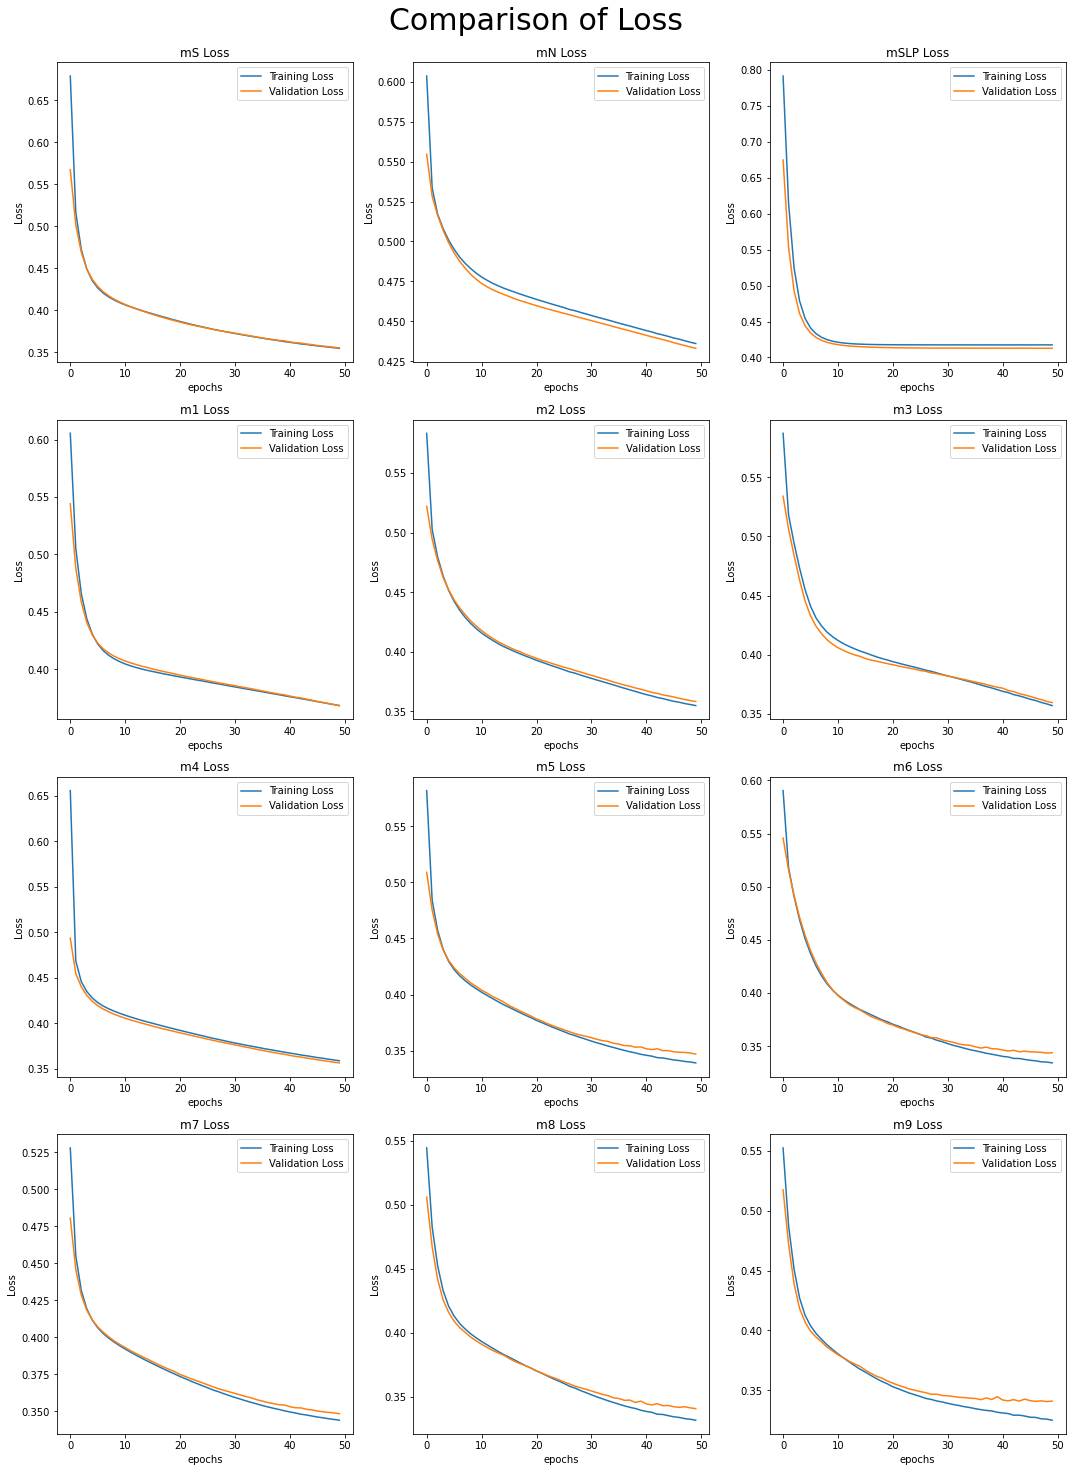

In [45]:
# plotting loss

models = [mS, mN, mSLP, m1, m2, m3, m4, m5, m6, m7, m8, m9]
model_names = ['mS', 'mN', 'mSLP', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9']


# model subplots
num_models = len(models)
num_columns = 3
num_rows = (num_models + num_columns - 1) // num_columns
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# go over models
for i, (model, model_name) in enumerate(zip(models, model_names)):
    # get model training history
    model_hist = globals()[model_name + '_hist']
    loss = model_hist['loss']
    val_loss = model_hist['val_loss']

    # calculate the row and column indices for the current subplot
    row_idx = i // num_columns
    col_idx = i % num_columns

    # plot values
    ax = axs[row_idx, col_idx]
    ax.plot(loss, label="Training Loss")
    ax.plot(val_loss, label="Validation Loss")

    # subplot info
    ax.set_title(f"{model_name} Loss")
    ax.set_ylabel('Loss')
    ax.set_xlabel('epochs')
    ax.legend()

# spacing
plt.tight_layout()

fig.suptitle('Comparison of Loss',fontsize=30).set_y(1.02)
plt.show();

### Evaluation in Code

In [46]:
df_tn

,Category,Standardization,Normalization,Single Layer Perceptron,"Model 1 - 1 hl, 16 n","Model 2 - 2 hl, 16 n","Model 3 - 3 hl, 16 n","Model 4 - 1 hl, 32 n","Model 5 - 2 hl, 32 n","Model 6 - 3 hl, 32 n","Model 7 - 1 hl, 64 n","Model 8 - 2 hl, 64 n","Model 9 - 3 hl, 64 n"
0,TP,276,143,180,261,292,313,273,317,352,279,313,356
1,FP,122,85,89,127,137,173,114,148,169,120,134,173
2,TN,1680,1717,1713,1675,1665,1629,1688,1654,1633,1682,1668,1629
3,FN,275,408,371,290,259,238,278,234,199,272,238,195


In [47]:
# getting dataframe to work on

dtn = df_tn.transpose()
dtn = dtn.set_axis(dtn.iloc[0], axis=1)
dtn = dtn[1:]
dtn = dtn.astype(int)
dtn

Category,TP,FP,TN,FN
Standardization,276,122,1680,275
Normalization,143,85,1717,408
Single Layer Perceptron,180,89,1713,371
"Model 1 - 1 hl, 16 n",261,127,1675,290
"Model 2 - 2 hl, 16 n",292,137,1665,259
"Model 3 - 3 hl, 16 n",313,173,1629,238
"Model 4 - 1 hl, 32 n",273,114,1688,278
"Model 5 - 2 hl, 32 n",317,148,1654,234
"Model 6 - 3 hl, 32 n",352,169,1633,199
"Model 7 - 1 hl, 64 n",279,120,1682,272


In [48]:
df_acc

,Category,Standardization,Normalization,Single Layer Perceptron,"Model 1 - 1 hl, 16 n","Model 2 - 2 hl, 16 n","Model 3 - 3 hl, 16 n","Model 4 - 1 hl, 32 n","Model 5 - 2 hl, 32 n","Model 6 - 3 hl, 32 n","Model 7 - 1 hl, 64 n","Model 8 - 2 hl, 64 n","Model 9 - 3 hl, 64 n"
0,Test Loss,0.355440,0.433057,0.412823,0.368405,0.358285,0.359367,0.356436,0.346957,0.343799,0.348295,0.340707,0.340897
1,Test Acc,0.831279,0.790480,0.804505,0.822779,0.831704,0.825329,0.833404,0.837654,0.843604,0.833404,0.841904,0.843604
2,Acc,0.831279,0.790480,0.804505,0.822779,0.831704,0.825329,0.833404,0.837654,0.843604,0.833404,0.841904,0.843604
3,Recall,0.500907,0.259528,0.326679,0.473684,0.529946,0.568058,0.495463,0.575318,0.638838,0.506352,0.568058,0.646098
4,Prec,0.693467,0.627193,0.669145,0.672680,0.680653,0.644033,0.705426,0.681720,0.675624,0.699248,0.700224,0.672968
5,F1 S.,0.581665,0.367137,0.439024,0.555911,0.595918,0.603664,0.582090,0.624016,0.656716,0.587368,0.627255,0.659259


In [49]:
# getting dataframe to work on

dac = df_acc.transpose()
dac = dac.set_axis(dac.iloc[0], axis=1)
dac = dac[1:]
dac = dac.astype(float)
dac

Category,Test Loss,Test Acc,Acc,Recall,Prec,F1 S.
Standardization,0.355440,0.831279,0.831279,0.500907,0.693467,0.581665
Normalization,0.433057,0.790480,0.790480,0.259528,0.627193,0.367137
Single Layer Perceptron,0.412823,0.804505,0.804505,0.326679,0.669145,0.439024
"Model 1 - 1 hl, 16 n",0.368405,0.822779,0.822779,0.473684,0.672680,0.555911
"Model 2 - 2 hl, 16 n",0.358285,0.831704,0.831704,0.529946,0.680653,0.595918
"Model 3 - 3 hl, 16 n",0.359367,0.825329,0.825329,0.568058,0.644033,0.603664
"Model 4 - 1 hl, 32 n",0.356436,0.833404,0.833404,0.495463,0.705426,0.582090
"Model 5 - 2 hl, 32 n",0.346957,0.837654,0.837654,0.575318,0.681720,0.624016
"Model 6 - 3 hl, 32 n",0.343799,0.843604,0.843604,0.638838,0.675624,0.656716
"Model 7 - 1 hl, 64 n",0.348295,0.833404,0.833404,0.506352,0.699248,0.587368


In [50]:
# TP, TN, FP, FN

# metric weigths
weight_fn = -2
weight_tp = 1
weight_tn = 0.5
weight_fp = 0.5

# score for each model
dtn['Score'] = (weight_fn * dtn['FN']) + (weight_tp * dtn['TP']) + (weight_tn * dtn['TN']) + (weight_fp * dtn['FP'])

# maximum score
best_model_tf = dtn['Score'].idxmax()
print(best_model_tf)

sorted_dtn = dtn.sort_values(by='Score', ascending=False)

# display all positions from best to worst
sorted_dtn

Model 9 - 3 hl, 64 n


Category,TP,FP,TN,FN,Score
"Model 9 - 3 hl, 64 n",356,173,1629,195,867.0
"Model 6 - 3 hl, 32 n",352,169,1633,199,855.0
"Model 5 - 2 hl, 32 n",317,148,1654,234,750.0
"Model 3 - 3 hl, 16 n",313,173,1629,238,738.0
"Model 8 - 2 hl, 64 n",313,134,1668,238,738.0
"Model 2 - 2 hl, 16 n",292,137,1665,259,675.0
"Model 7 - 1 hl, 64 n",279,120,1682,272,636.0
Standardization,276,122,1680,275,627.0
"Model 4 - 1 hl, 32 n",273,114,1688,278,618.0
"Model 1 - 1 hl, 16 n",261,127,1675,290,582.0


In [51]:
# Acc, Recall, Prec, F1 S.

# sort on ranking criteria
sorted_dac = dac.sort_values(by=["Recall", "F1 S.", "Test Loss", "Test Acc", "Acc", "Prec"], ascending=[False, False, True, False, False, False])

best_model_m = sorted_dac.iloc[0]
print(best_model_m)

# display all positions from best to worst
sorted_dac

Category
Test Loss    0.340897
Test Acc     0.843604
Acc          0.843604
Recall       0.646098
Prec         0.672968
F1 S.        0.659259
Name: Model 9 - 3 hl, 64 n, dtype: float64


Category,Test Loss,Test Acc,Acc,Recall,Prec,F1 S.
"Model 9 - 3 hl, 64 n",0.340897,0.843604,0.843604,0.646098,0.672968,0.659259
"Model 6 - 3 hl, 32 n",0.343799,0.843604,0.843604,0.638838,0.675624,0.656716
"Model 5 - 2 hl, 32 n",0.346957,0.837654,0.837654,0.575318,0.681720,0.624016
"Model 8 - 2 hl, 64 n",0.340707,0.841904,0.841904,0.568058,0.700224,0.627255
"Model 3 - 3 hl, 16 n",0.359367,0.825329,0.825329,0.568058,0.644033,0.603664
"Model 2 - 2 hl, 16 n",0.358285,0.831704,0.831704,0.529946,0.680653,0.595918
"Model 7 - 1 hl, 64 n",0.348295,0.833404,0.833404,0.506352,0.699248,0.587368
Standardization,0.355440,0.831279,0.831279,0.500907,0.693467,0.581665
"Model 4 - 1 hl, 32 n",0.356436,0.833404,0.833404,0.495463,0.705426,0.582090
"Model 1 - 1 hl, 16 n",0.368405,0.822779,0.822779,0.473684,0.672680,0.555911


# Optimizing the activation

pick 3 best models (9, 6, 5) and check for the best activation

In [52]:
make_model('m9_opt',3,64,'tanh',X_stand)
make_model('m6_opt',3,32,'tanh',X_stand)
make_model('m5_opt',2,32,'tanh',X_stand)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.7670 - val_loss: 0.4230 - val_accuracy: 0.8007
Epoch 2/50
172/172 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.7974 - val_l

172/172 [==============================] - 1s 4ms/step - loss: 0.5583 - accuracy: 0.7309 - val_loss: 0.4814 - val_accuracy: 0.7803
Epoch 2/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.7934 - val_loss: 0.4358 - val_accuracy: 0.7896
Epoch 3/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8032 - val_loss: 0.4190 - val_accuracy: 0.7998
Epoch 4/50
172/172 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8082 - val_loss: 0.4113 - val_accuracy: 0.8037
Epoch 5/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8109 - val_loss: 0.4077 - val_accuracy: 0.8045
Epoch 6/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8105 - val_loss: 0.4053 - val_accuracy: 0.8071
Epoch 7/50
172/172 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8109 - val_loss: 0.4042 - val_accuracy: 0.8079
Epoch 8/50
172/17

## Graphical evaluation

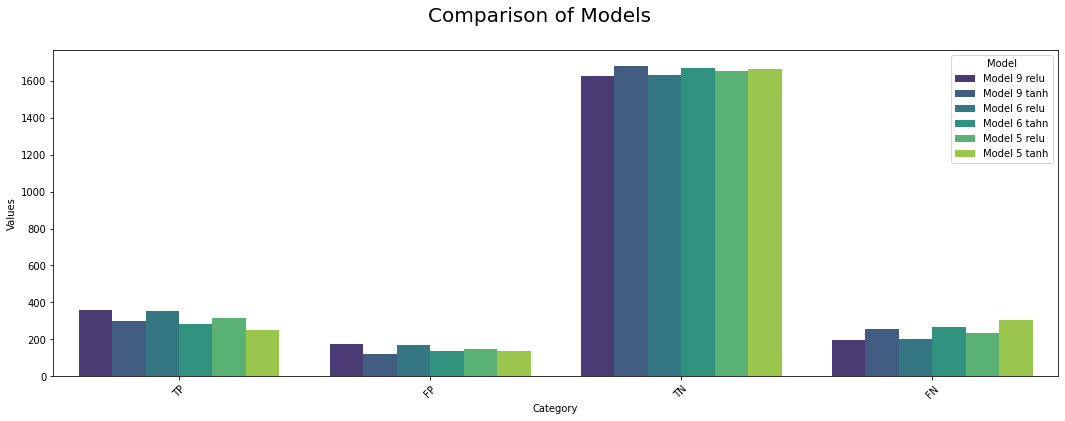

In [53]:
# plotting evaulation for relu vs tanh TP, TN, FP, FN

plt.figure(figsize=(18, 6))

# values
keys_tn_opt = ['tp', 'fp', 'tn', 'fn']
m9_tn = [m9.get(key) for key in keys_tn_opt]
m9_opt_tn = [m9_opt.get(key) for key in keys_tn_opt]
m6_tn = [m6.get(key) for key in keys_tn_opt]
m6_opt_tn = [m6_opt.get(key) for key in keys_tn_opt]
m5_tn = [m5.get(key) for key in keys_tn_opt]
m5_opt_tn = [m5_opt.get(key) for key in keys_tn_opt]

# data
df_tn_opt = {'Category': ['TP', 'FP', 'TN', 'FN'],
        'Model 9 relu': m9_tn,
        'Model 9 tanh': m9_opt_tn,
        'Model 6 relu': m6_tn,
        'Model 6 tahn': m6_opt_tn,
        'Model 5 relu': m5_tn,
        'Model 5 tanh': m5_opt_tn}
df_tn_opt = pd.DataFrame(df_tn_opt)


# melt data into a single column
melted_df_tn_opt= df_tn_opt.melt('Category', var_name='Model', value_name='Value')


# plotting
plt.subplot(1, 1, 1)  # 1 row, 2columns, subplot 1
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_tn_opt, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.suptitle('Comparison of Models', fontsize=20)
plt.show();

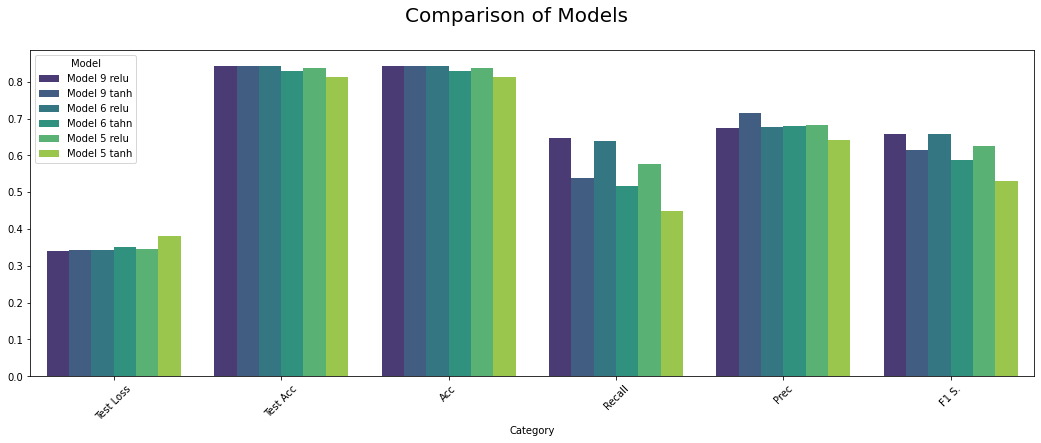

In [54]:
# plotting evaulation for relu vs tanh on test loss, test accuracy, accuracy, recall, precision and F1 score.

plt.figure(figsize=(18, 6))

# values
keys_acc_opt = ['test_loss', 'test_acc', 'ass', 'rs', 'ps', 'f1']
m9_opt_acc = [m9.get(key) for key in keys_acc_opt]
m9_opt_acc = [m9_opt.get(key) for key in keys_acc_opt]
m6_acc = [m6.get(key) for key in keys_acc_opt]
m6_opt_acc = [m6_opt.get(key) for key in keys_acc_opt]
m5_acc = [m5.get(key) for key in keys_acc_opt]
m5_opt_acc = [m5_opt.get(key) for key in keys_acc_opt]

# data
df_acc_opt = {'Category': categories_acc,
        'Model 9 relu': m9_acc,
        'Model 9 tanh': m9_opt_acc,
        'Model 6 relu': m6_acc,
        'Model 6 tahn': m6_opt_acc,
        'Model 5 relu': m5_acc,
        'Model 5 tanh': m5_opt_acc}
df_acc_opt = pd.DataFrame(df_acc_opt)

# melt data into a single column
melted_df_acc_opt= df_acc_opt.melt('Category', var_name='Model', value_name='Value')

# plotting
sns.barplot(x='Category', y='Value', hue='Model', data=melted_df_acc_opt, palette='viridis')
plt.xlabel('Category')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45)

plt.suptitle('Comparison of Models', fontsize=20)
plt.show();

## Coded evaluation

In [55]:
# getting dataframe to work on

dftn_opt = df_tn_opt.transpose()
dftn_opt = dftn_opt.set_axis(dftn_opt.iloc[0], axis=1)
dftn_opt = dftn_opt[1:]
dftn_opt = dftn_opt.astype(int)
dftn_opt

Category,TP,FP,TN,FN
Model 9 relu,356,173,1629,195
Model 9 tanh,297,119,1683,254
Model 6 relu,352,169,1633,199
Model 6 tahn,285,134,1668,266
Model 5 relu,317,148,1654,234
Model 5 tanh,248,138,1664,303


In [56]:
# getting dataframe to work on

dfacc_opt = df_acc_opt.transpose()
dfacc_opt = dfacc_opt.set_axis(dfacc_opt.iloc[0], axis=1)
dfacc_opt = dfacc_opt[1:]
dfacc_opt = dfacc_opt.astype(float)
dfacc_opt

Category,Test Loss,Test Acc,Acc,Recall,Prec,F1 S.
Model 9 relu,0.340897,0.843604,0.843604,0.646098,0.672968,0.659259
Model 9 tanh,0.343860,0.841479,0.841479,0.539020,0.713942,0.614271
Model 6 relu,0.343799,0.843604,0.843604,0.638838,0.675624,0.656716
Model 6 tahn,0.350287,0.830004,0.830004,0.517241,0.680191,0.587629
Model 5 relu,0.346957,0.837654,0.837654,0.575318,0.681720,0.624016
Model 5 tanh,0.382021,0.812580,0.812580,0.450091,0.642487,0.529349


In [57]:
# TP, TN, FP, FN

# score for each model
dftn_opt['Score'] = (weight_fn * dftn_opt['FN']) + (weight_tp * dftn_opt['TP']) + (weight_tn * dftn_opt['TN']) + (weight_fp * dftn_opt['FP'])

# maximum score
best_model_tf_opt = dftn_opt['Score'].idxmax()
print(best_model_tf_opt)

sorted_dftn_opt = dftn_opt.sort_values(by='Score', ascending=False)

# display all positions from best to worst
sorted_dftn_opt

Model 9 relu


Category,TP,FP,TN,FN,Score
Model 9 relu,356,173,1629,195,867.0
Model 6 relu,352,169,1633,199,855.0
Model 5 relu,317,148,1654,234,750.0
Model 9 tanh,297,119,1683,254,690.0
Model 6 tahn,285,134,1668,266,654.0
Model 5 tanh,248,138,1664,303,543.0


In [58]:
# Acc, Recall, Prec, F1 S.

# sort on ranking criteria
sorted_dfacc_opt = dfacc_opt.sort_values(by=["Recall", "F1 S.", "Test Loss", "Test Acc", "Acc", "Prec"], ascending=[False, False, True, False, False, False])

best_model_dfacc_opt = sorted_dfacc_opt.iloc[0]
print(best_model_dfacc_opt)

# display all positions from best to worst
sorted_dfacc_opt

Category
Test Loss    0.340897
Test Acc     0.843604
Acc          0.843604
Recall       0.646098
Prec         0.672968
F1 S.        0.659259
Name: Model 9 relu, dtype: float64


Category,Test Loss,Test Acc,Acc,Recall,Prec,F1 S.
Model 9 relu,0.340897,0.843604,0.843604,0.646098,0.672968,0.659259
Model 6 relu,0.343799,0.843604,0.843604,0.638838,0.675624,0.656716
Model 5 relu,0.346957,0.837654,0.837654,0.575318,0.681720,0.624016
Model 9 tanh,0.343860,0.841479,0.841479,0.539020,0.713942,0.614271
Model 6 tahn,0.350287,0.830004,0.830004,0.517241,0.680191,0.587629
Model 5 tanh,0.382021,0.812580,0.812580,0.450091,0.642487,0.529349
